In [9]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt
     

In [5]:
print(tf.__version__)

2.14.0


In [8]:
a = tf.constant(6) #creating constants
b = tf.constant(3)
sess = tf.Session()
sess.run(a)

6

In [22]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [14]:
mnist

<module 'keras.api._v1.keras.datasets.mnist' from 'C:\\Users\\amrit\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\keras\\api\\_v1\\keras\\datasets\\mnist\\__init__.py'>

In [38]:
x_train.shape ,y_train.shape


((60000, 28, 28), (60000,))

In [43]:
X_train[59999].shape

(28, 28)

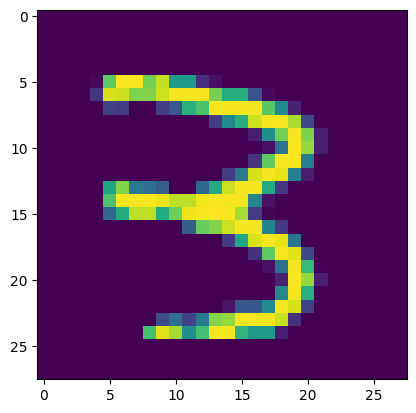

3

In [39]:
image1 = x_train[4138]
image1=np.array(image1,float)
image1=image1.reshape((28,28))
plt.imshow(image1)
plt.show()
y_train[4138]

In [47]:
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256
n_classes = 1

weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'h1': tf.Variable(tf.random_normal([n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [28]:
def fwd_prop(x,weights,biases):
    layer1=tf.add(tf.matmul(x,weights['h1']),biases['h1'])
    layer1=tf.nn.relu(layer1)  #activation 
    
    layer2=tf.add(tf.matmul(layer1,weights['h2']),biases['h2'])
    layer2=tf.nn.relu(layer2)
    
    output=tf.add(tf.matmul(layer2,weights['out']),biases['out'])
    return output

In [51]:
x_train = x_train.reshape(-1, 784)
y_train = y_train.reshape(-1, 1)
sess = tf.Session()
sess.run(tf.global_variables_initializer())
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder(tf.int32, [None, n_classes])

In [52]:
pred = fwd_prop(x, weights, biases)
predictions = tf.argmax(pred, 1)
true_labels = tf.argmax(y, 1)
correct_predictions = tf.equal(predictions, true_labels)

In [53]:
predictions_eval,labels, correct_pred  = sess.run([predictions, true_labels, correct_predictions], feed_dict={x:x_train, y:y_train})
predictions_eval,labels,correct_pred

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([ True,  True,  True, ...,  True,  True,  True]))

In [54]:
correct_pred.sum() 

60000